In [1]:
import numpy as np
from math import pi
from spatialmath import *

import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook


# Working in 3D

## Rotation

Rotations in 3D can be represented by rotation matrices – 3x3 orthonormal matrices – which belong to the group $\mbox{SO}(3)$. These are a subset of all possible 3x3 real matrices.

We can create such a matrix, a rotation of $\pi/4$ radians around the x-axis by

In [2]:
R1 = SO3.Rx(pi/4)

which is an object of type

In [3]:
type(R1)

spatialmath.pose3d.SO3

which contains an $\mbox{SO}(3)$ matrix. We can display that matrix

In [4]:
R1

   1         0         0         
   0         0.7071   -0.7071    
   0         0.7071    0.7071    


which is colored red if the console supports color.

The matrix, a numpy array, is encapsulated and not directly settable by the user. This way we can ensure that the matrix is proper member of the $\mbox{SO}(3)$ group.

We can _compose_ these rotations using the Python `*` operator

In [5]:
R1 * R1

   1         0         0         
   0         0        -1         
   0         1         0         


which is a rotation by $\pi/4$ _then_ another rotation by $\pi/4$ which is a total rotation of $\pi/2$ about the X-axis.  We can doublecheck that

In [6]:
SO3.Rx(pi/2)

   1         0         0         
   0         0        -1         
   0         1         0         


We could also have used the exponentiation operator

In [7]:
R1**2

   1         0         0         
   0         0        -1         
   0         1         0         


We can also specify the angle in degrees

In [8]:
SO3.Rx(45, 'deg')

   1         0         0         
   0         0.7071   -0.7071    
   0         0.7071    0.7071    


We can visualize what this looks like by

<IPython.core.display.Javascript object>


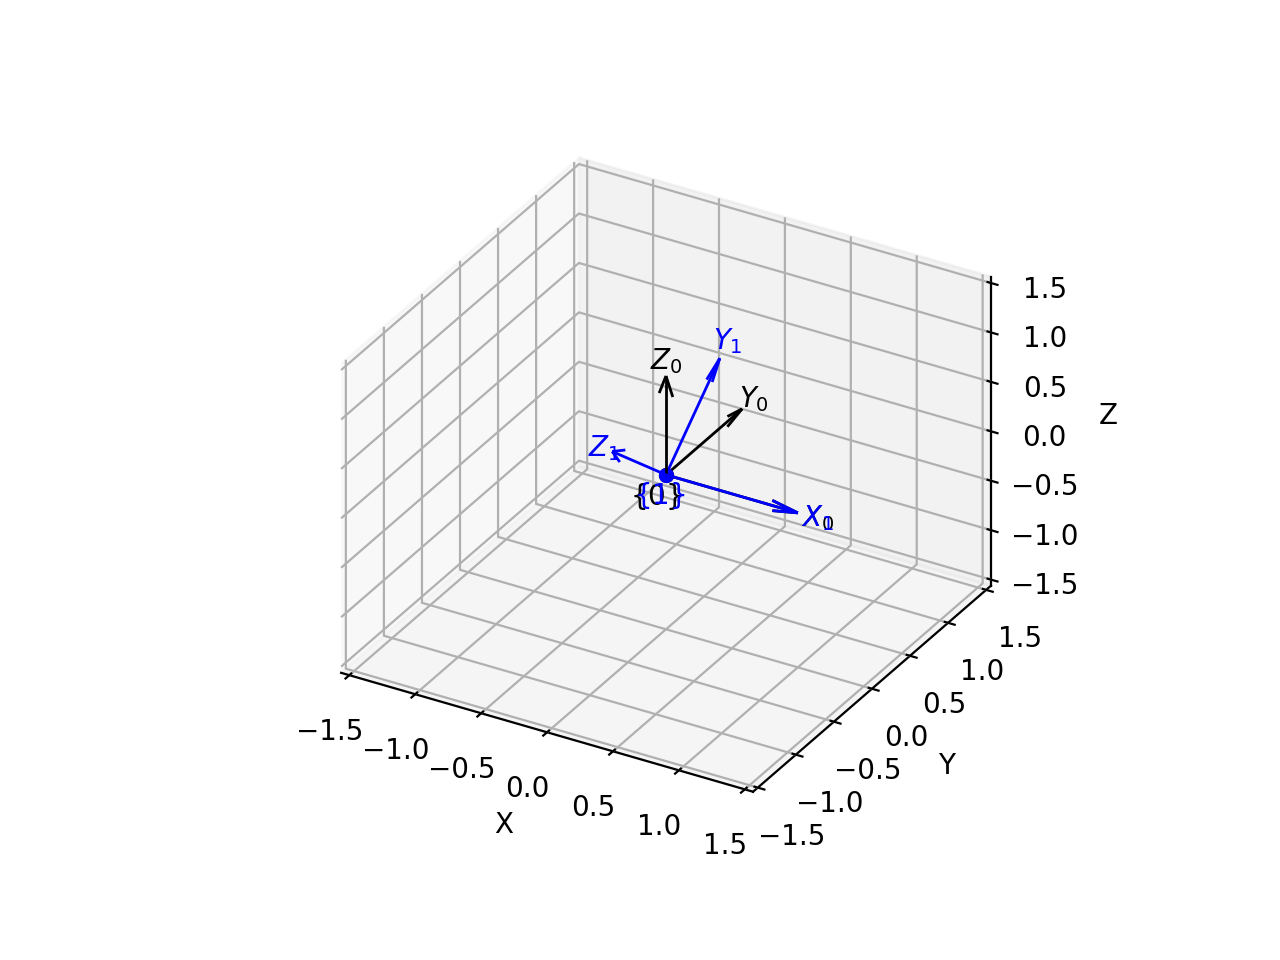

In [118]:
fig = plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-1.5,1.5], color='black')
R1.plot(frame='1')

Click on the coordinate frame and use the mouse to change the viewpoint.  The world reference frame is shown in black, and the rotated frame is shown in blue.

Often we need to describe more complex orientations and we typically use a _3 angle_ convention to do this.  Euler's rotation theorem says that any orientation can be expressed in terms of three rotations about different axes.  

One common convention is roll-pitch-yaw angles

In [10]:
R2 = SO3.RPY([10, 20, 30], unit='deg')
R2

   0.8138   -0.441     0.3785    
   0.4698    0.8826    0.01803   
  -0.342     0.1632    0.9254    


which says that we rotate by 30&deg; about the Z-axis (yaw), _then_ 20&deg; about the Y-axis (pitch) and _then_ 10&deg; about the X-axis – this is the ZYX roll-pitch yaw convention.  Note that:

1. the first rotation in the sequence involves the last element in the angle sequence.
2. we can change angle convention, for example by passing `order='xyz'`

We can visualize the resulting orientation.

<IPython.core.display.Javascript object>


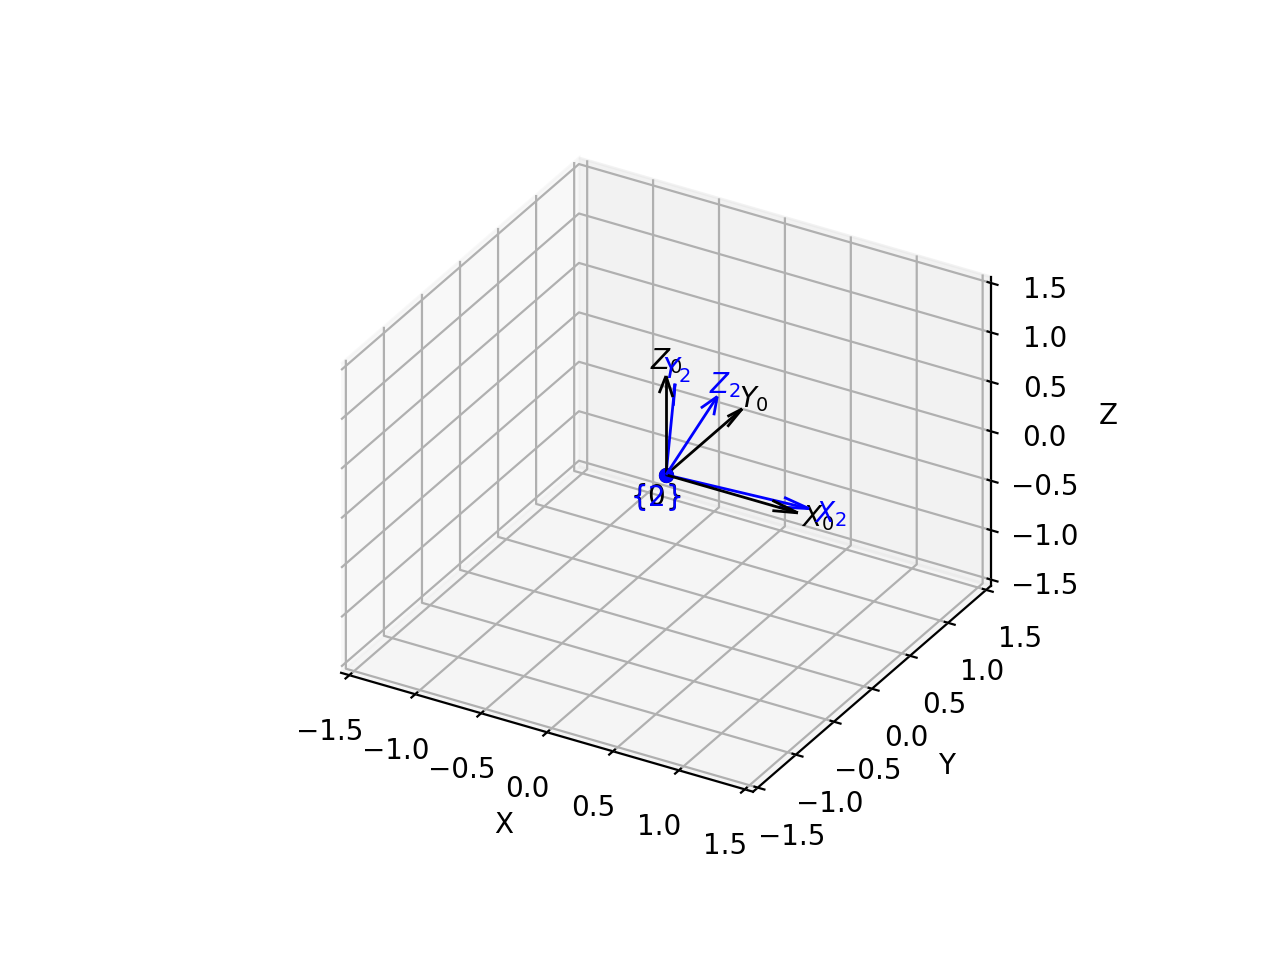

In [119]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-1.5,1.5], color='black')
R2.plot(frame='2')

We can convert any rotation matrix back to its 3-angle representation

In [12]:
R2.rpy()

array([0.17453293, 0.34906585, 0.52359878])

### Constructors

The default constructor yields a null rotation

In [13]:
SO3()

   1         0         0         
   0         1         0         
   0         0         1         


which is represented by the identity matrix.

The class supports a number of variant constructors using class methods:

| Constructor   |  rotation |
|---------------|-----------|
| SO3()          | null rotation |
| SO3.Rx(theta)  |  about X-axis |
| SO3.Ry(theta)  |  about Y-axis|
| SO3.Rz(theta)  |  about Z-axis|
| SO3.RPY(rpy)  |  from roll-pitch-yaw angle vector|
| SO3.Eul(euler)  | from Euler angle vector |
| SO3.AngVec(theta, v)  | from rotation and axis |
| SO3.Omega(v)  | from a twist vector |
| SO3.OA  | from orientation and approach vectors |

Imagine we want a rotation that describes a frame that has its y-axis (o-vector) pointing in the world negative z-axis direction and its z-axis (a-vector) pointing in the world x-axis direction

In [14]:
SO3.OA(o=[0,0,-1], a=[1,0,0])

   0         0         1         
  -1         0         0         
   0        -1         0         


We can redo our earlier example using `SO3.Rx()` with the explicit angle-axis notation

In [15]:
SO3.AngVec(pi/4, [1,0,0])

   1         0         0         
   0         0.7071   -0.7071    
   0         0.7071    0.7071    


or

In [16]:
SO3.Exp([pi/4,0,0])

   1         0         0         
   0         0.7071   -0.7071    
   0         0.7071    0.7071    


or a more complex example

In [17]:
SO3.AngVec(30, [1,2,3], unit='deg')

   0.8756   -0.3818    0.296     
   0.42      0.9043   -0.07621   
  -0.2386    0.191     0.9522    


### Properties

The object has a number of properties, such as the columns which are often written as ${\bf R} = [n, o, a]$ where $n$, $o$ and $a$ are 3-vectors.  For example

In [18]:
R1.n

array([1., 0., 0.])

or its inverse (in this case its transpose)

In [19]:
R1.inv()

   1         0         0         
   0         0.7071    0.7071    
   0        -0.7071    0.7071    


the shape of the underlying matrix

In [20]:
R1.shape

(3, 3)

and the order

In [21]:
R1.N

3

indicating it operates in 3D space.

### Predicates

We can check various properties of the object using properties and methods that are common to all classes in this package

In [22]:
[R1.isSE, R1.isSO, R1.isrot(), R1.ishom(), R1.isrot2(), R1.ishom2()]

[False, True, True, False, False, False]

The last four in this list provide compatibility with the Spatial Math Toolbox for MATLAB.

## Quaternions

A quaternion is often described as a type of complex number but it is more useful (and simpler) to think of it as an order pair comprising a scalar and a vector.  We can create a quaternions

In [23]:
q1 = Quaternion([1,2,3,4])
q1

 1.0000 <  2.0000,  3.0000,  4.0000 >


where the scalar is before the angle brackets which enclose the vector part.  

Properties allow us to extract the scalar part

In [24]:
q1.s

1

and the vector part

In [25]:
q1.v

array([2, 3, 4])

and we can represent it as a numpy array

In [26]:
q1.vec

array([1, 2, 3, 4])

A quaternion has a conjugate

In [27]:
q1.conj()

 1.0000 < -2.0000, -3.0000, -4.0000 >


and a norm, which is the magnitude of the equivalent 4-vector 

In [28]:
q1.norm()

5.477225575051661

We can create a second quaternion

In [29]:
q2 = Quaternion([5,6,7,8])
q2

 5.0000 <  6.0000,  7.0000,  8.0000 >


Operators allow us to add

In [30]:
q1 + q2

 6.0000 <  8.0000,  10.0000,  12.0000 >


subtract

In [31]:
q1 - q2

-4.0000 < -4.0000, -4.0000, -4.0000 >


and to multiply

In [32]:
q1 * q2

-60.0000 <  12.0000,  30.0000,  24.0000 >


which follows the special rules of Hamilton multiplication.

Multiplication can also be performed as the linear algebraic product of one quaternion converted to a 4x4 matrix  

In [33]:
q1.matrix

array([[ 1., -2., -3., -4.],
       [ 2.,  1., -4.,  3.],
       [ 3.,  4.,  1., -2.],
       [ 4., -3.,  2.,  1.]])

and the other as a 4-vector 

In [34]:
q1.matrix @ q2.vec

array([-60.,  12.,  30.,  24.])

The product of a quaternion and its conjugate is a scalar equal to the square of its norm

In [35]:
q1 * q1.conj()

 30.0000 <  0.0000,  0.0000,  0.0000 >


Conversely, a quaternion with a zero scalar part is called a _pure quaternion_

In [36]:
Quaternion.Pure([1, 2, 3])

 0.0000 <  1.0000,  2.0000,  3.0000 >


### Unit quaternions

A quaternion with a unit norm is called a _unit quaternion_ .  It is a group and its elements represent rotation in 3D space.  It is in all regards like an $\mbox{SO}(3)$ matrix except for a _double mapping_ -- a quaternion and its element-wise negation represent the same rotation.

In [37]:
q1 = UnitQuaternion.Rx(30, 'deg')
q1

 0.9659 <<  0.2588,  0.0000,  0.0000 >>


the convention is that unit quaternions are denoted using double angle brackets.  The norm, as advertised is indeed one

In [38]:
q1.norm()

1.0

We create another unit quaternion

In [39]:
q2 = UnitQuaternion.Ry(-40, 'deg')
q2

 0.9397 <<  0.0000, -0.3420,  0.0000 >>


The rotations can be composed by quaternion multiplication

In [40]:
q3 = q1 * q2
q3

 0.9077 <<  0.2432, -0.3304, -0.0885 >>


We can convert a quaternion to a rotation matrix

In [41]:
q3.R

array([[ 7.66044443e-01, -2.77555756e-17, -6.42787610e-01],
       [-3.21393805e-01,  8.66025404e-01, -3.83022222e-01],
       [ 5.56670399e-01,  5.00000000e-01,  6.63413948e-01]])

which yields exactly the same answer as if we'd done it using SO(3) rotation matrices

In [42]:
SO3.Rx(30, 'deg') * SO3.Ry(-40, 'deg')

   0.766     0        -0.6428    
  -0.3214    0.866    -0.383     
   0.5567    0.5       0.6634    


The advantages of unit quaternions are that

1. they are compact, just 4 numbers instead of 9
2. multiplication involves fewer operations and is therefore faster
3. numerical errors build up when we multiply rotation matrices together many times, and they lose the structure (the columns are no longer unit length or orthogonal).  Correcting this, the process of _normalization_ is expensive.  For unit quaternions errors will also compound, but normalization is simply a matter of dividing through by the norm

Unit quaternions have an inverse

In [43]:
q2.inv()

 0.9397 << -0.0000,  0.3420, -0.0000 >>


In [44]:
q1 * q2.inv()

 0.9077 <<  0.2432,  0.3304,  0.0885 >>


or

In [45]:
q1 / q2

 0.9077 <<  0.2432,  0.3304,  0.0885 >>


We can convert any unit quaternion to an SO3 object if we wish

In [46]:
q1.SO3()

   1         0         0         
   0         0.866    -0.5       
   0         0.5       0.866     


and conversely, any `SO3` object to a unit quaternion

In [47]:
UnitQuaternion( SO3.Rx(30, 'deg'))

 0.9659 <<  0.2588,  0.0000,  0.0000 >>


A unit quaternion is not a minimal representation. Since we know the magnitude is 1, then with any 3 elements we can compute the fourth upto a sign ambiguity. 

In [48]:
q1.vec3

array([0.25881905, 0.        , 0.        ])

In [49]:
a = UnitQuaternion.qvmul( q1.vec3, q2.vec3)
a

array([ 0.24321035, -0.33036609, -0.08852133])

from which we can recreate the unit quaternion

In [50]:
UnitQuaternion.Vec3(a)

 0.9077 <<  0.2432, -0.3304, -0.0885 >>


## Representing position

In robotics we also need to describe the position of objects and we can do this with a _homogeneous transformation_ matrix – a 4x4 matrix – which belong to the group $\mbox{SE}(3)$ which is a subset of all 4x4 real matrices.

We can create such a matrix, for a translation of 1 in the x-direction, 2 in the y-direction and 3 in the z-direction by

In [51]:
T1 = SE3(1, 2, 3)
T1

   1         0         0         1         
   0         1         0         2         
   0         0         1         3         
   0         0         0         1         


which is displayed in a color coded fashion: rotation matrix in red, translation vector in blue, and the constant bottom row in grey.  We note that the red matrix is an _identity matrix_ .

The class supports a number of variant constructors using class methods.

| Constructor   |  motion |
|---------------|-----------|
| SE3()      | null motion |
| SE3.Tx(d)  |  translation along X-axis |
| SE3.Ty(d)  |  translation along Y-axis |
| SE3.Tz(d)  |  translation along Z-axis |
| SE3.Rx(theta)  |  rotation about X-axis |
| SE3.Ry(theta)  |  rotation about Y-axis|
| SE3.Rz(theta)  |  rotation about Z-axis|
| SE3.RPY(rpy)  |  rotation from roll-pitch-yaw angle vector|
| SE3.Eul(euler)  | rotation from Euler angle vector |
| SE3.AngVec(theta, v)  | rotation from rotation and axis |
| SO3.Omega(v)  | from a twist vector |
| SE3.OA(ovec, avec)  | rotation from orientation and approach vectors |

We can visualize this

<IPython.core.display.Javascript object>


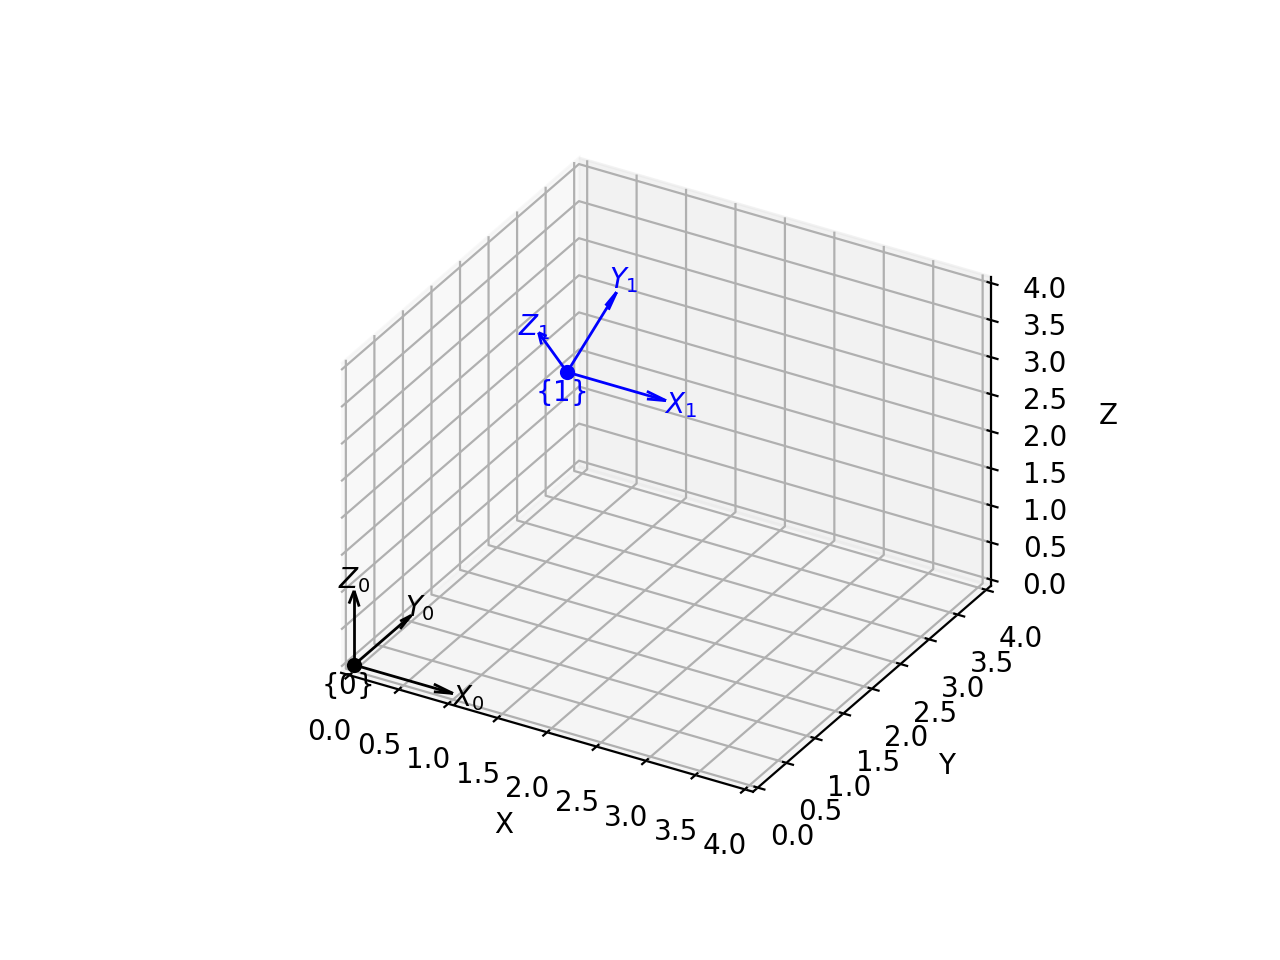

In [120]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

We can define another translation

In [53]:
T12 = SE3(2, -1, -2)

and compose it with `T1`

In [54]:
T2 = T1 * T12

In [55]:
T2.plot(frame='2', color='red')

## Representing pose

In [56]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')
T1

   1         0         0         1         
   0         0.866    -0.5       2         
   0         0.5       0.866     3         
   0         0         0         1         


Is a composition of two motions: a pure translation and _then_ a pure rotation.  We can see the rotation matrix, computed above, in the top-left corner and the translation components in the right-most column.  In the earlier example `Out[24]` was simply a null-rotation which is represented by the identity matrix.

The frame now looks like this

<IPython.core.display.Javascript object>


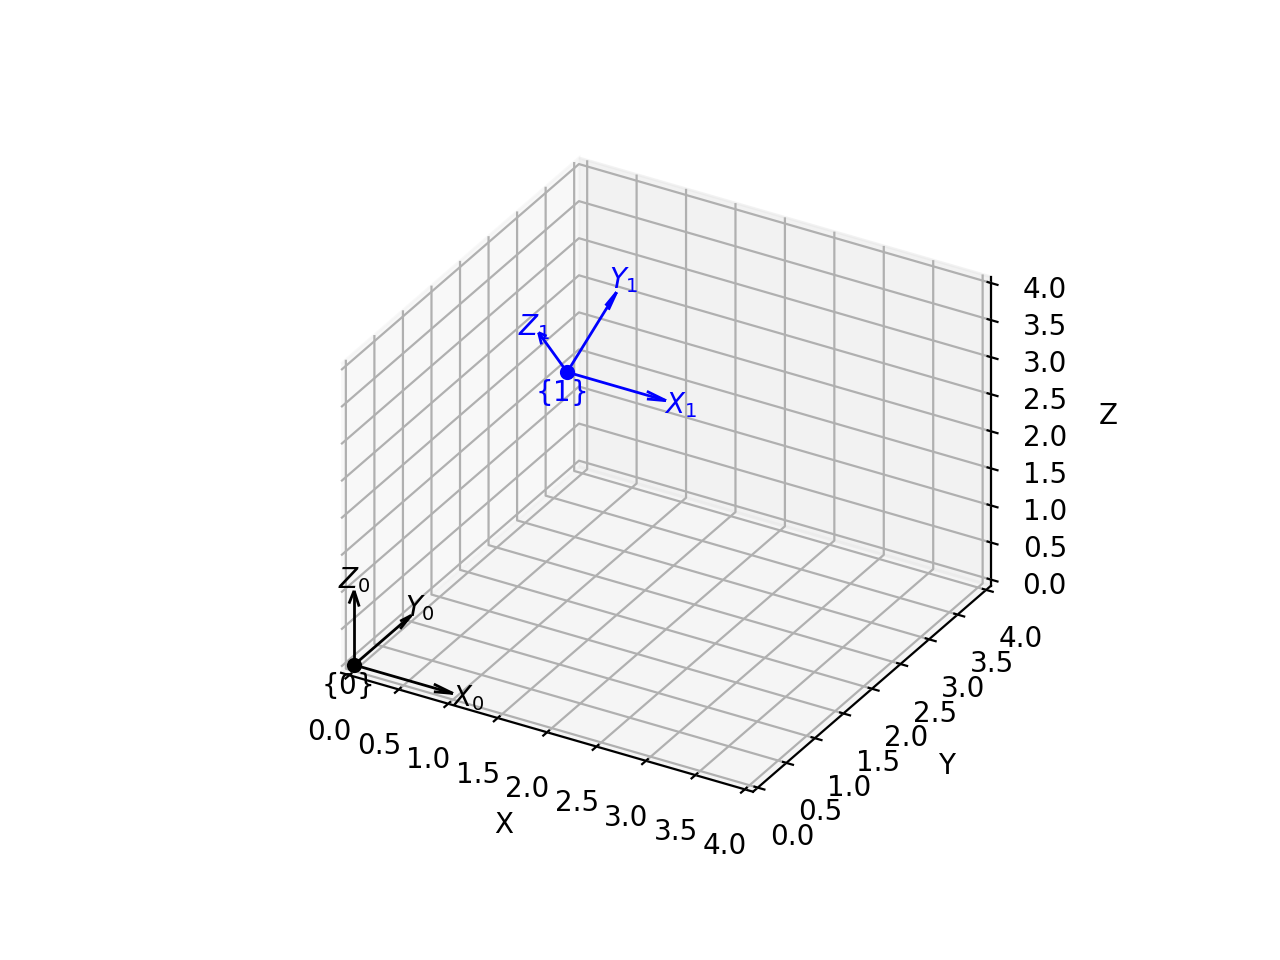

In [121]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,4], color='black')
T1.plot(frame='1')

### Properties

The object has a number of properties, such as the columns which are often written as $[n, o, a]$

In [58]:
T1.o

array([0.       , 0.8660254, 0.5      ])

or its inverse (computed in an efficient manner based on the structure of the matrix)

In [59]:
T1.inv()

   1         0         0        -1         
   0         0.866     0.5      -3.232     
   0        -0.5       0.866    -1.598     
   0         0         0         1         


We can extract the rotation matrix as a numpy array

In [60]:
T1.R

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.8660254, -0.5      ],
       [ 0.       ,  0.5      ,  0.8660254]])

or the translation vector, as a numpy array

In [61]:
T1.t

array([1., 2., 3.])

The shape of the underlying SE(3) matrix is

In [62]:
T1.shape

(4, 4)

and the order

In [63]:
T1.N

3

indicating it operates in 3D space.

### Predicates

We can check various properties

In [64]:
[T1.isSE, T1.isSO, T1.isrot(), T1.ishom(), T1.isrot2(), T1.ishom2()]

[True, False, False, True, False, False]

### A couple of important points:

When we compose motions they must be of the same type.  An `SE3` object can represent pure transation, pure rotation or both.  If we wish to compose a translation with a rotation, the rotation must be an `SE3` object - a rotation plus zero translation.

SUperset

### Transforming points

Imagine now a set of points defining the vertices of a cube

In [65]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
P

array([[-1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1]])

defined with respect to a body reference frame ${}^A P_i$.  Given a transformation ${}^0 \mathbf{T}_A$ from the world frame to the body frame, we determine the coordinates of the points in the world frame by ${}^0 P_i = {}^0 \mathbf{T}_A \, {}^A P_i$ which we can perform in a single operation

In [66]:
Q = T1 * P

which we can now plot

<IPython.core.display.Javascript object>


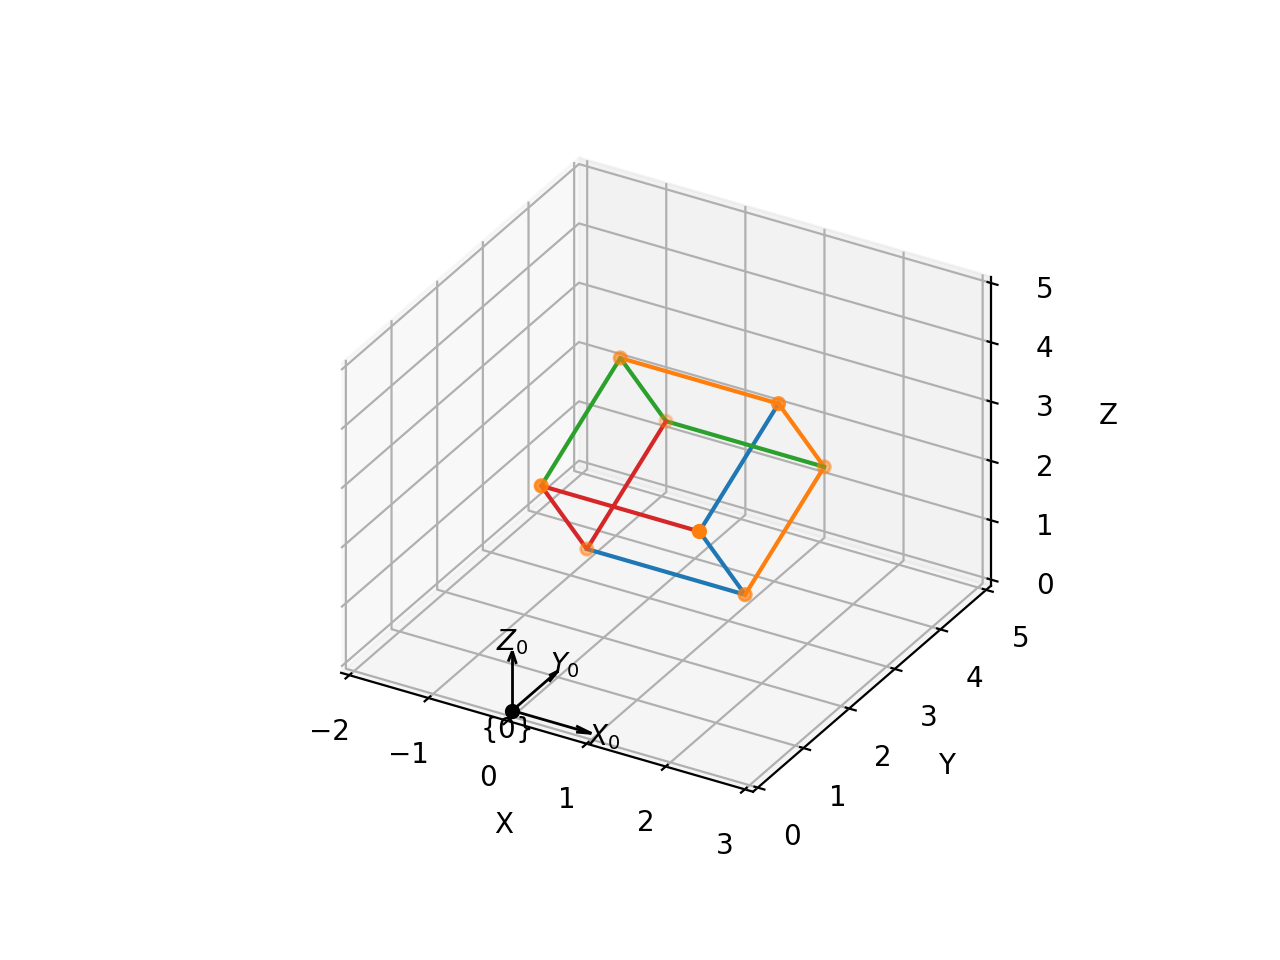

In [122]:
fig = plt.figure()
SE3().plot(frame='0', dims=[-2,3,0,5,0,5], color='black')
ax = plt.gca()
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)  # draw vertices

# draw lines joining the vertices
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])

This is often used in SLAM and bundle adjustment algorithms since it is compact and better behaved than using roll-pitch-yaw or Euler angles.

## Twists
A twist is an alternative way to represent a 3D pose, but it is more succinct, comprising just 6 values.  In constrast an SE(3) matrix has 16 values with a considerable amount of redundancy, but it does offer consider computational convenience.

Twists are the logarithm of an SE(3) matrix

In [68]:
T = SE3.Rand()
T

  -0.6324   -0.7406   -0.2271   -0.04585   
  -0.7672    0.5583    0.3156    0.7525    
  -0.1069    0.3739   -0.9213   -0.1349    
   0         0         0         1         


In [69]:
T.log()

array([[ 0.        ,  0.60099592, -2.7124978 , -0.67791998],
       [-0.60099592,  0.        , -1.31423621,  0.48676492],
       [ 2.7124978 ,  1.31423621,  0.        , -0.31757507],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

How do we know this is really the logarithm? Well, we can exponentiate it

In [70]:
lg = T.log()
SE3.Exp(lg)

  -0.6324   -0.7406   -0.2271   -0.04585   
  -0.7672    0.5583    0.3156    0.7525    
  -0.1069    0.3739   -0.9213   -0.1349    
   0         0         0         1         


and we have reconstituted our original matrix. 

The logarithm is a matrix with a very particular structure, it has a zero diagonal and bottom row, and the top-left 3x3 matrix is skew symmetric.  This matrix has only 6 unique elements: three from the last column, and three from the skew symmetric matrix, and we can request the `log` method to give us just these

In [71]:
T.log(twist=True)

array([-0.67791998,  0.48676492, -0.31757507,  1.31423621, -2.7124978 ,
       -0.60099592])

This 6-vector is a twist, a concise way to represent the translational and rotational components of a pose. Twists are represented by their own class

In [72]:
tw = Twist3(T)
tw

(-0.67792 0.48676 -0.31758; 1.3142 -2.7125 -0.601)

Just like the other pose objects, `Twist3` objects can have multiple values.

Twists can be composed

In [73]:
T = SE3(1, 2, 3) * SE3.Rx(0.3)
tw = Twist3(T)
tw

(1 2.435 2.6775; 0.3 0 0)

Now we can compose the twists

In [74]:
tw2 = tw * tw
tw2

(2 4.87 5.3549; 0.6 0 0)

and the result is just the same as if we had composed the transforms

In [75]:
Twist3(T * T)

(2 4.87 5.3549; 0.6 0 0)

Twists have great utility for robot arm kinematics, to compute the forward kinematics and Jacobians.  Twist objects have a number of methods.

The adjoint is a 6x6 matrix that relates velocities

In [76]:
tw.Ad()

array([[ 1.        ,  0.        ,  0.        ,  0.        , -2.27496905,
         2.7972336 ],
       [ 0.        ,  0.95533649, -0.29552021,  3.        , -0.29552021,
        -0.95533649],
       [ 0.        ,  0.29552021,  0.95533649, -2.        ,  0.95533649,
        -0.29552021],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.95533649,
        -0.29552021],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.29552021,
         0.95533649]])

and the `SE3` object also has this method.

The logarithm of the adjoint is given by

In [77]:
tw.ad()

array([[ 0.        , -0.        ,  0.        ,  0.        , -2.67746618,
         2.43497745],
       [ 0.        ,  0.        , -0.3       ,  2.67746618,  0.        ,
        -1.        ],
       [-0.        ,  0.3       ,  0.        , -2.43497745,  1.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.3       ],
       [ 0.        ,  0.        ,  0.        , -0.        ,  0.3       ,
         0.        ]])

The name twist comes from considering the rigid-body motion as a rotation and a translation along a unique line of action.  It rotates as it moves along the line following a screw like motion, hence its other name as a _screw_.  The line in 3D space is described in Plücker coordinates by

In [78]:
tw.line()

{ -1.09 -2.435 -2.6775; 0.3 0 0}

The pitch of the screw is

In [79]:
tw.pitch()

0.3

and a point on the line is

In [80]:
tw.pole()

array([ 0.        , -2.67746618,  2.43497745])

# Working in 2D

Things are actually much simpler in 2D.  There's only one possible rotation which is around an axis perpendicular to the plane (where the z-axis would have been if it were in 3D).

Rotations in 2D can be represented by rotation matrices – 2x2 orthonormal matrices – which belong to the group SO(2). Just as for the 3D case these matrices have special properties, each column (and row) is a unit vector, and they are all orthogonal, the inverse of this matrix is equal to its transpose, and its determinant is +1.

We can create such a matrix, a rotation of $\pi/4$ radians by

In [81]:
R = SO2(pi/4)
R

   0.7071   -0.7071    
   0.7071    0.7071    


or in degrees

In [82]:
SO2(45, unit='deg')

   0.7071   -0.7071    
   0.7071    0.7071    


and we can plot this on the 2D plane

<IPython.core.display.Javascript object>


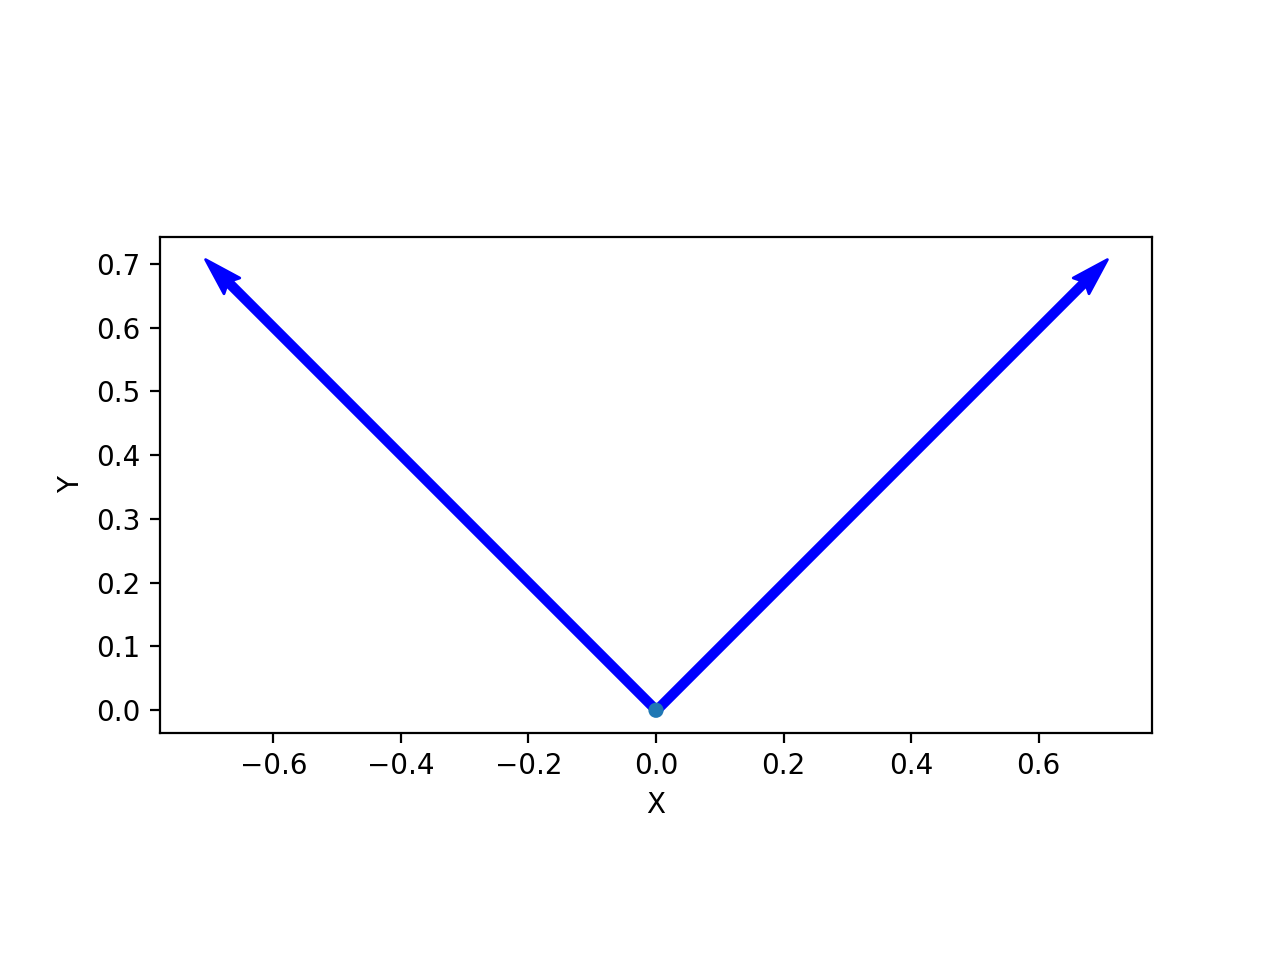

In [123]:
plt.figure() # create a new figure
R.plot()

Once again, it's useful to describe the position of things and we do this this with a homogeneous transformation matrix – a 3x3 matrix – which belong to the group SE(2).

In [125]:
T = SE2(1, 2)
T

   1         0         1         
   0         1         2         
   0         0         1         


which has a similar structure to the 3D case.  The rotation matrix is in the top-left corner and the translation components are in the right-most column.

We can also call the function with the element in a list

In [126]:
T = SE2([1, 2])

<IPython.core.display.Javascript object>


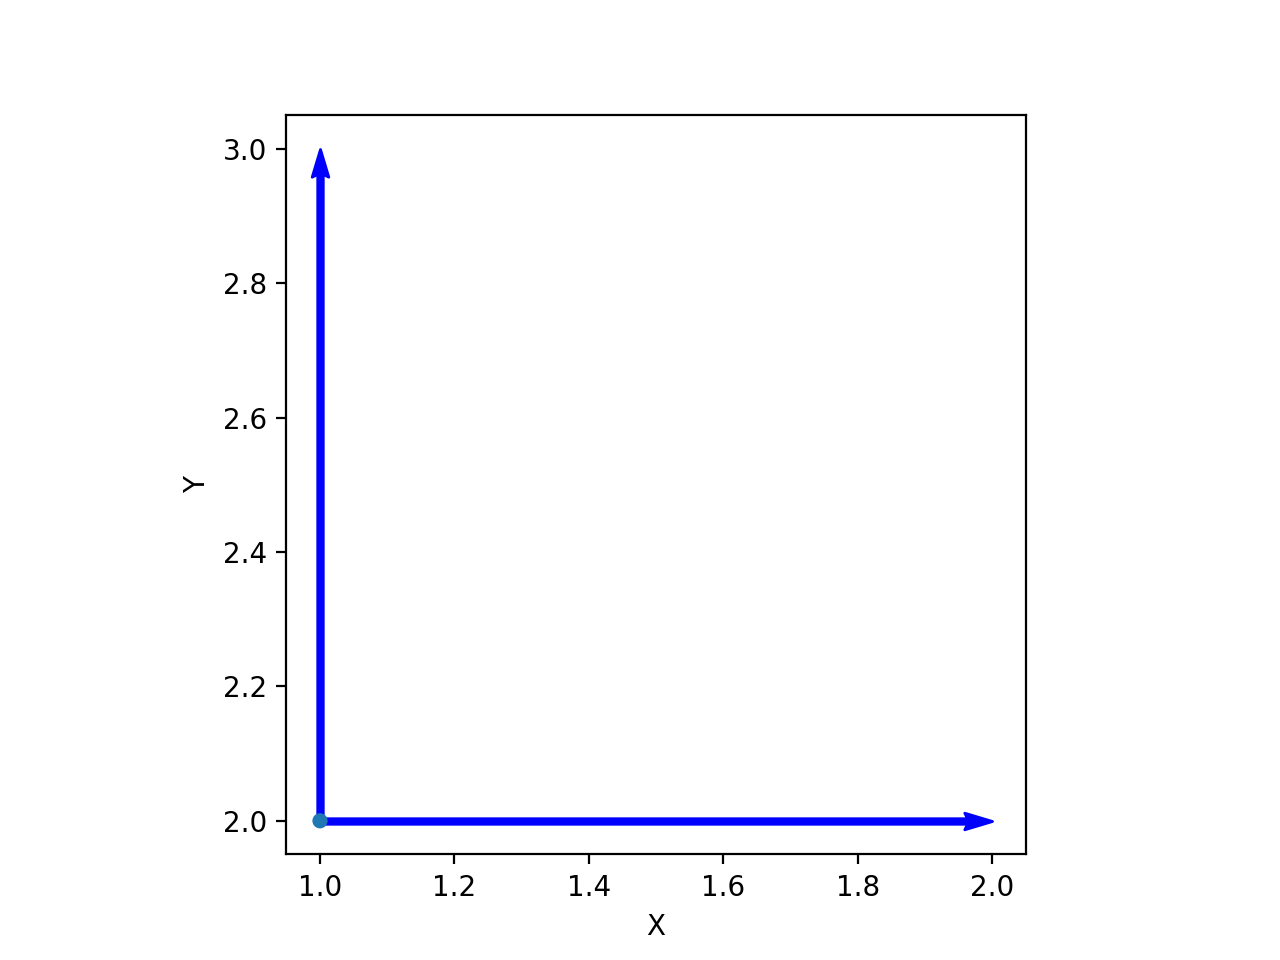

In [127]:
plt.figure() # create a new figure
T.plot()

In [128]:
T2 = SE2(45, unit='deg')
T2

   0.7071   -0.7071    0         
   0.7071    0.7071    0         
   0         0         1         


<IPython.core.display.Javascript object>


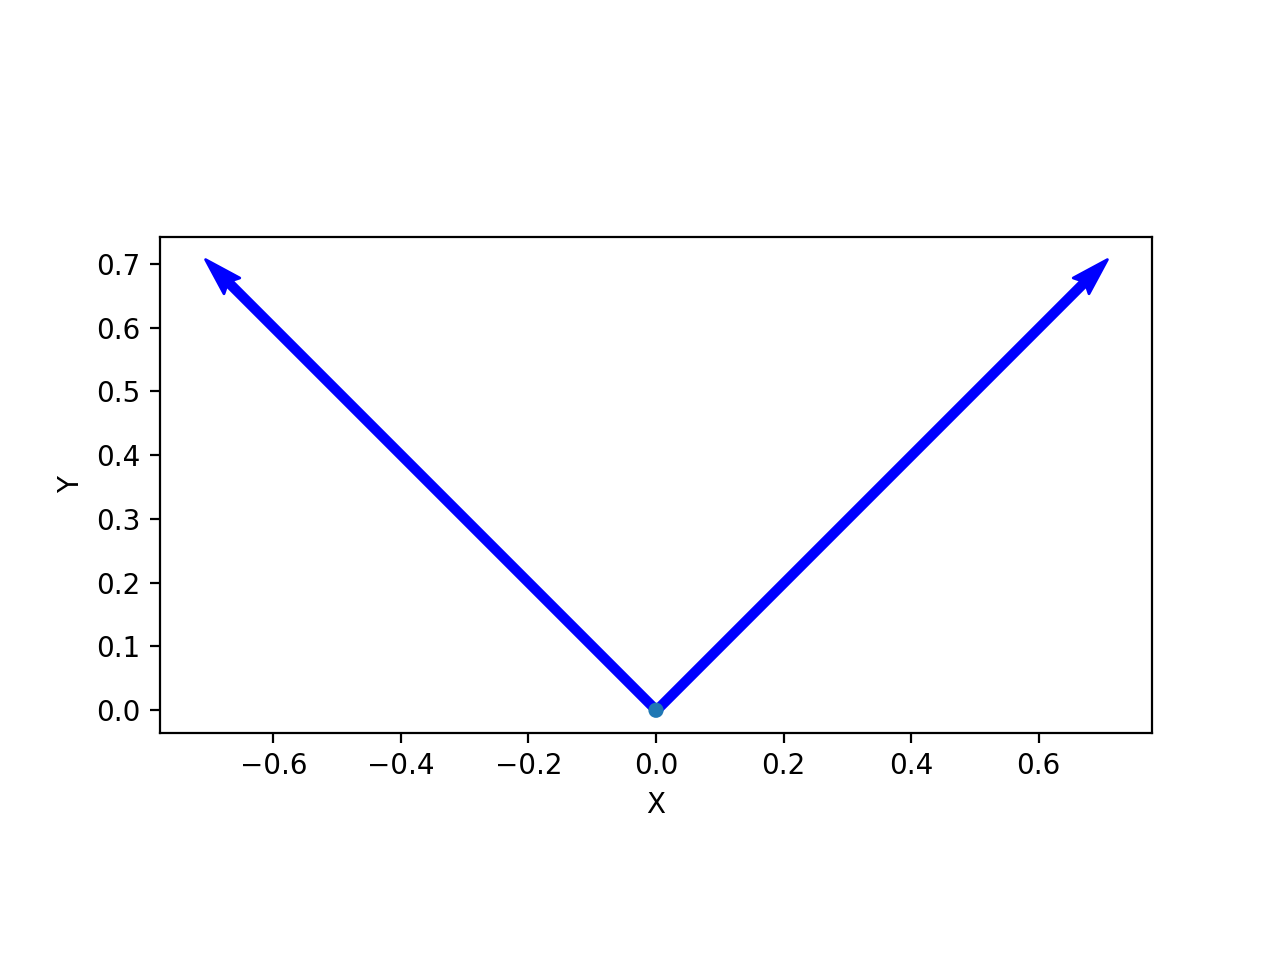

In [129]:
plt.figure() # create a new figure
T2.plot()

The inplace versions of operators are also supported, for example

In [130]:
X = T
X /= T2
X

   0.7071    0.7071    1         
  -0.7071    0.7071    2         
   0         0         1         


# Operators

## Group operators

For the 3D case, the classes we have introduced mimic the behavior the mathematical groups $\mbox{SO}(3)$ and $\mbox{SE}(3)$ which contain matrices of particular structure. They are subsets respectively of the sets of all possible real 3x3 and 4x4 matrices.

The only operations on two elements of the group that also belongs to the group are composition (represented by the `*` operator) and inversion.

In [90]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')
[type(T1), type(T1.inv()), type(T1*T1)]

[spatialmath.pose3d.SE3, spatialmath.pose3d.SE3, spatialmath.pose3d.SE3]

If we know the pose of frame {2} and a _rigid body motion_ from frame {1} to frame {2}

In [91]:
T2 = SE3(4, 5, 6) * SE3.Ry(-40, 'deg')
T12 = SE3(0, -2, -1) * SE3.Rz(70, 'deg')

then ${}^0{\bf T}_1 \bullet {}^1{\bf T}_2 = {}^0{\bf T}_2$ then ${}^0{\bf T}_1 =  {}^1{\bf T}_2 \bullet ({}^0{\bf T}_2)^{-1}$ which we write as

In [92]:
T1 * T2.inv()

   0.766     0         0.6428   -5.921     
   0.3214    0.866    -0.383    -1.318     
  -0.5567    0.5       0.6634   -1.254     
   0         0         0         1         


or more concisely as

In [93]:
T1 / T2

   0.766     0         0.6428   -5.921     
   0.3214    0.866    -0.383    -1.318     
  -0.5567    0.5       0.6634   -1.254     
   0         0         0         1         


Exponentiation is also a group operator since it is simply repeated composition

In [94]:
T1 ** 2

   1         0         0         2         
   0         0.5      -0.866     2.232     
   0         0.866     0.5       6.598     
   0         0         0         1         


## Non-group operations

Operations such as addition and subtraction are valid for matrices but not for elements of the group, therefore these operations will return a numpy array rather than a group object

In [95]:
SE3() + SE3()

array([[2., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 2.]])

yields an array, not an `SE3` object. As do other non-group operations

In [96]:
2 * SE3()

array([[2., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 2.]])

In [97]:
SE3() - 1

array([[ 0., -1., -1., -1.],
       [-1.,  0., -1., -1.],
       [-1., -1.,  0., -1.],
       [-1., -1., -1.,  0.]])

Similar principles apply to quaternions.  Unit quaternions are a group and only support composition and inversion.  Any other operations will return an ordinary quaternion

In [98]:
UnitQuaternion() * 2

 2.0000 <  0.0000,  0.0000,  0.0000 >


which is indicated by the single angle brackets.

## In-place operators

All of Pythons in-place operators are available as well, whether for group or non-group operations.  For example

In [99]:
T = T1
T *= T2
T **= 2

# Multi-valued objects

For many tasks we might want to have a set or sequence of rotations or poses. The obvious solution would be to use a Python list

In [100]:
T = [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)]

but the pose objects in this package can hold multiple values, just like a native Python list can.  There are a few ways to do this, most obviously

In [101]:
T = SE3( [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)] )

which has type of a pose object

In [102]:
type(T)

spatialmath.pose3d.SE3

but it has length of five

In [103]:
len(T)

5

that is, it contains five values.  We can see these when we display the object's value

In [104]:
T

0:
   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         
1:
   1         0         0         0         
   0         0.995    -0.09983   0         
   0         0.09983   0.995     0         
   0         0         0         1         
2:
   1         0         0         0         
   0         0.9801   -0.1987    0         
   0         0.1987    0.9801    0         
   0         0         0         1         
3:
   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         
4:
   1         0         0         0         
   0         0.9211   -0.3894    0         
   0         0.3894    0.9211    0         
   0         0         0         1         


We can index into the object (slice it) just as we would a Python list

In [105]:
T[3]

   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         


or from the second element to the last in steps of two

In [106]:
T[1:-1:2]

0:
   1         0         0         0         
   0         0.995    -0.09983   0         
   0         0.09983   0.995     0         
   0         0         0         1         
1:
   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         


We could another value to the end

In [107]:
T.append( SE3.Rx(0.5) )
len(T)

6

The `SE3` class, like all the classes in this package, inherits from the `UserList` class giving it all the methods of a Python list like append, extend, del etc.  We can also use them as _iterables_ in _for_ loops and in list comprehensions.

You can create an object of a particular type with no elements using this constructor

In [108]:
T = SE3.Empty()
len(T)

0

which is the equivalent of setting a variable to `[]`.

We could write the above example more succinctly

In [109]:
T = SE3.Rx( np.linspace(0, 0.5, 5) )
len(T)

5

In [110]:
T[3]

   1         0         0         0         
   0         0.9305   -0.3663    0         
   0         0.3663    0.9305    0         
   0         0         0         1         


Consider another rotation

In [111]:
T2 = SE3.Ry(40, 'deg')

If we write

In [112]:
A = T * T2
len(A)

5

we obtain a new list where each element of `A` is `T[i] * T2`.  Similarly

In [113]:
B = T2 * T
len(B)

5

which has produced a new list where each element of `B` is `T2 * T[i]`.

Similarly

In [114]:
C = T * T
len(C)

5

yields a new list where each element of `C` is the `T[i] * T[i]`.  

We can apply such a sequence to a coordinate vectors as we did earlier

In [115]:
P = T * [0, 1, 0]
P

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.99219767, 0.96891242, 0.93050762, 0.87758256],
       [0.        , 0.12467473, 0.24740396, 0.36627253, 0.47942554]])

where each element of `T` has transformed the coordinate vector (0, 1, 0), the results being consecutive columns of the resulting numpy array.

This is equivalent to writing

In [116]:
np.column_stack([x * [0,1,0] for x in T])

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.99219767, 0.96891242, 0.93050762, 0.87758256],
       [0.        , 0.12467473, 0.24740396, 0.36627253, 0.47942554]])

## C++ like programming model
Lists are useful, but we might like to use a programming model where we allocate an array of pose objects and reference them or assign to them.  We can do that to!

In [117]:
T = SE3.Alloc(5)  # create a vector of SE3 values

for i, theta in enumerate(np.linspace(0, 1, len(T))):
    T[i] = SE3.Rz(theta)
T

0:
   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         
1:
   0.9689   -0.2474    0         0         
   0.2474    0.9689    0         0         
   0         0         1         0         
   0         0         0         1         
2:
   0.8776   -0.4794    0         0         
   0.4794    0.8776    0         0         
   0         0         1         0         
   0         0         0         1         
3:
   0.7317   -0.6816    0         0         
   0.6816    0.7317    0         0         
   0         0         1         0         
   0         0         0         1         
4:
   0.5403   -0.8415    0         0         
   0.8415    0.5403    0         0         
   0         0         1         0         
   0         0         0         1         


``Alloc`` initializes every element to the identity value.  This technique works for all pose objects.